In [1]:
from causalinfo import *

In [2]:
# You only need this if you want to draw pretty pictures of the Networks
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

## Creating and Assigning Variables

Let's begin by creating an example of Arnaud's. We start by creating some variables. They each have a name, and a number of states. All our variables have 2 states, 0 and 1. We'll treat this like False and True.

Notes:
* We can have any number of discrete states, we just using 2
* I'm using the convention of naming the python variables the same as our causal `Variable`s.

In [10]:
s = Variable('S', 2)
a = Variable('A', 2)
b = Variable('B', 2)

We can look at these variables to see what they contain...


In [11]:
s

,S
0,?
1,?


`S` doesn't have any distribution assigned to it. We'll need to assign one if they are input variables (or we're manipulating them). Otherwise the distributions is calculated from the upstream variables.

In [21]:
s.assign([.2, .8])
s

,S
0,0.2
1,0.8


In [22]:
s.assign_uniform()
s

,S
0,0.5
1,0.5


## Creating Equations

We can now relate these variables using equations. I've defined some common `mappings` that you can use (you can also create your own mappings --- a topic for later).

In [14]:
same_eq = Equation('SAME', [s], [a], mappings.f_same)
xnor_eq = Equation('XNOR', [s, a], [b], mappings.f_xnor)

We can also examine these equations to see what mappings they give...

In [15]:
same_eq

Equation<SAME>

In [16]:
xnor_eq

Equation<XNOR>

## Creating Causal Networks

We can now put these equations together to form causal networks.

In [18]:
network = CausalNetwork([same_eq, xnor_eq])

We can also look at these (if you have the right things installed... more later).

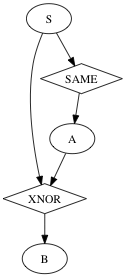

In [20]:
draw(network.full_network)

## Generating Joint Distributions

These networks can now be used to generate joint distributions over all the variables. (Note that we prune all zero probability events)

In [23]:
j = network.generate_joint()
j

,S,A,B,Pr
0,0,0,1,0.5
1,1,1,1,0.5


We can look at the joint distribution of just some of those variables...

In [37]:
j.joint(a, b)

,,Pr
A,B,
0,1,0.5
1,1,0.5


...and we can calculate the mutual information, and conditional mutual information

In [26]:
j.mutual_info(a, b)

0.0

In [35]:
j.mutual_info(a, b, s)

0.0

## Interventions

We can also intervene on this graph. We'll need to assign a distribution to the variable if we want to do this.

In [28]:
a.assign_uniform()
a

,A
0,0.5
1,0.5


We then generate a new joint distribution, with the interventions...

In [30]:
j_do = network.generate_joint(do=[a])

In [31]:
j_do.mutual_info(a, b)

0.0

In [33]:
j_do.mutual_info(a, b, s)

1.0